In [16]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

datos = pd.read_excel('C:/Users/Noel/Documents/Universidad/4º/2º Cuatri/Trabajo Fin de Grado/TFG_Datos.xlsx', usecols=['Fecha', 'P','G(i)','H_sun','T2m','WS10m','Int'])
#datos = pd.read_csv('C:/Users/Noel/Desktop/TFM/TFG_Datos.csv')
print(datos)

                  Fecha    P  G(i)  H_sun   T2m  WS10m  Int
0      2017-01-01 00:01  0.0   0.0    0.0  4.59   2.07  0.0
1      2017-01-01 01:01  0.0   0.0    0.0  4.57   2.07  0.0
2      2017-01-01 02:01  0.0   0.0    0.0  4.76   1.93  0.0
3      2017-01-01 03:01  0.0   0.0    0.0  5.34   1.79  0.0
4      2017-01-01 04:01  0.0   0.0    0.0  5.09   1.79  0.0
...                 ...  ...   ...    ...   ...    ...  ...
35059  2020-12-31 19:01  0.0   0.0    0.0  7.86   4.34  0.0
35060  2020-12-31 20:01  0.0   0.0    0.0  7.75   3.79  0.0
35061  2020-12-31 21:01  0.0   0.0    0.0  7.69   3.24  0.0
35062  2020-12-31 22:01  0.0   0.0    0.0  7.66   3.03  0.0
35063  2020-12-31 23:01  0.0   0.0    0.0  7.54   3.59  0.0

[35064 rows x 7 columns]


In [17]:
datos['Fecha'] = pd.to_datetime(datos['Fecha'], format='%Y-%m-%d %H:%M')
datos = datos.set_index('Fecha')
datos = datos.sort_index()
datos.index = datos.index.to_period('T')
datos.head()

C:\Users\Noel\AppData\Local\Temp\ipykernel_11008\538440468.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  datos.index = datos.index.to_period('T')


,P,G(i),H_sun,T2m,WS10m,Int
Fecha,,,,,,
2017-01-01 00:01,0.0,0.0,0.0,4.59,2.07,0.0
2017-01-01 01:01,0.0,0.0,0.0,4.57,2.07,0.0
2017-01-01 02:01,0.0,0.0,0.0,4.76,1.93,0.0
2017-01-01 03:01,0.0,0.0,0.0,5.34,1.79,0.0
2017-01-01 04:01,0.0,0.0,0.0,5.09,1.79,0.0


In [18]:
print(datos.index[0])             # Primer elemento del índice
print(datos.index[-1])            # Último elemento del índice
print(datos.index[-1]-datos.index[0])# Diferencia

2017-01-01 00:01
2020-12-31 23:01
<2103780 * Minutes>


In [19]:
import seaborn as sns

Pot=datos['P']

fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x=Pot.index.to_timestamp(), y=Pot.values, ax=ax)

ModuleNotFoundError: No module named 'seaborn'

In [20]:
#!pip install plotly
import plotly.express as px

Muestras=len(Pot)
Muestras_hora=1
#transformada de fourier
tf=abs(np.fft.rfft(Pot,Muestras))
#Vector Frecuencias, eje hor
frec=np.fft.rfftfreq(Muestras,d=1./Muestras_hora)
#Grafica
fig=px.line(x=frec,y=tf,log_x=True)
fig.update_layout(xaxis_title=f'Frecuency (1/hour)')
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
frec1=0.04166667
frec2=0.0833333
frec3=114.0771e-6
print(f'La frecuencia 1 de {frec1} equivale {1/frec1} a horas')
print(f'La frecuencia 2 de {frec2} equivale {1/frec2} a horas')
print(f'La frecuencia 3 de {frec3} equivale {1/frec3} a horas, es decir {1/frec3/24/365.25} años')

La frecuencia 1 de 0.04166667 equivale 23.99999808000015 a horas
La frecuencia 2 de 0.0833333 equivale 12.00000480000192 a horas
La frecuencia 3 de 0.0001140771 equivale 8766.001239512574 a horas, es decir 1.00000014140002 años


In [21]:
indice_max = np.argmax(tf)  # Get the index of the maximum value
valor_max = tf[indice_max]  # Use the index to access the maximum value
frecuencia_max = frec[indice_max] 

print("Valor máximo de la FFT:", valor_max)
print("Frecuencia correspondiente:", frecuencia_max, "Hz")


NameError: name 'tf' is not defined

In [ ]:
indices = np.where(tf == np.max(tf)) # Use the index to access the maximum value 
print(frec[indices])  # Access the corresponding frequency value

[0.]


In [ ]:
# Extraer la hora del índice
datos['hora'] = datos.index.hour
datos['mes'] = datos.index.month
print(datos)


                    P  G(i)  H_sun   T2m  WS10m  Int  hora  mes
Fecha                                                          
2017-01-01 00:01  0.0   0.0    0.0  4.59   2.07  0.0     0    1
2017-01-01 01:01  0.0   0.0    0.0  4.57   2.07  0.0     1    1
2017-01-01 02:01  0.0   0.0    0.0  4.76   1.93  0.0     2    1
2017-01-01 03:01  0.0   0.0    0.0  5.34   1.79  0.0     3    1
2017-01-01 04:01  0.0   0.0    0.0  5.09   1.79  0.0     4    1
...               ...   ...    ...   ...    ...  ...   ...  ...
2020-12-31 19:01  0.0   0.0    0.0  7.86   4.34  0.0    19   12
2020-12-31 20:01  0.0   0.0    0.0  7.75   3.79  0.0    20   12
2020-12-31 21:01  0.0   0.0    0.0  7.69   3.24  0.0    21   12
2020-12-31 22:01  0.0   0.0    0.0  7.66   3.03  0.0    22   12
2020-12-31 23:01  0.0   0.0    0.0  7.54   3.59  0.0    23   12

[35064 rows x 8 columns]


In [ ]:
datos=datos.reset_index()
datos=datos.drop(columns=['Fecha'])
datos

,P,G(i),H_sun,T2m,WS10m,Int,hora,mes
0,0.0,0.0,0.0,4.59,2.07,0.0,0,1
1,0.0,0.0,0.0,4.57,2.07,0.0,1,1
2,0.0,0.0,0.0,4.76,1.93,0.0,2,1
3,0.0,0.0,0.0,5.34,1.79,0.0,3,1
4,0.0,0.0,0.0,5.09,1.79,0.0,4,1
...,...,...,...,...,...,...,...,...
35059,0.0,0.0,0.0,7.86,4.34,0.0,19,12
35060,0.0,0.0,0.0,7.75,3.79,0.0,20,12
35061,0.0,0.0,0.0,7.69,3.24,0.0,21,12
35062,0.0,0.0,0.0,7.66,3.03,0.0,22,12


In [ ]:
datos.shape

(35064, 6)

In [22]:
# Función para generar las particiones preservando las características
# de la serie de tiempo

def train_val_test_split(dataframe, tr_size=0.8, vl_size=0.1, ts_size=0.1 ):
    # Definir número de datos en cada subserie
    N = dataframe.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = dataframe[0:Ntrain]
    val = dataframe[Ntrain:Ntrain+Nval]
    test = dataframe[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
entrenamiento, validacion, prueba = train_val_test_split(datos)

print(f'Tamaño set de entrenamiento: {entrenamiento.shape}')
print(f'Tamaño set de validación: {validacion.shape}')
print(f'Tamaño set de prueba: {prueba.shape}')


Tamaño set de entrenamiento: (28051, 6)
Tamaño set de validación: (3506, 6)
Tamaño set de prueba: (3507, 6)


In [23]:
from sklearn.preprocessing import StandardScaler

def escalar_dataset(data_train,data_validation,data_test, col_ref):
    '''Escala el dataset utilizando StandardScaler.

    Entradas:
    - data_input: diccionario con los dataset de entrada y salida del modelo

    - col_ref: parámetro adicional para especificar la columna que contiene
      la variable a predecir


    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

       # Número de instantes de tiempo de entrada y de covariables
    NFEATS = data_train.shape[1]

    # Generar listado con "scalers", 1 por cada covariable de entrada
    scalers = [StandardScaler() for _ in range(NFEATS)]

    # Escalamiento: se usarán todo los parámetros para escalar
    # Escalamiento de los valores de train,val y test
    datos_t = np.zeros(data_train.shape)
    datos_v = np.zeros(data_validation.shape)
    datos_ts = np.zeros(data_test.shape)

    for i, scaler in enumerate(scalers):
 # Escalar datos de entrenamiento
        datos_i = data_train.iloc[:, i].values.reshape(-1, 1)
        datos_t[:, i] = scaler.fit_transform(datos_i).flatten()

        # Escalar datos de validación
        datos_j = data_validation.iloc[:, i].values.reshape(-1, 1)
        datos_v[:, i] = scaler.transform(datos_j).flatten()

        # Escalar datos de prueba
        datos_k = data_test.iloc[:, i].values.reshape(-1, 1)
        datos_ts[:, i] = scaler.transform(datos_k).flatten()

    return datos_t,datos_v,datos_ts, scalers[data_train.columns.get_loc(col_ref)]

In [24]:

# Escalar el dataset con la función anterior
tr, vl, ts, scaler = escalar_dataset(entrenamiento, validacion, prueba, col_ref='P')

# Convertir los resultados a DataFrame
tr = pd.DataFrame(tr, columns=list(datos.columns.values))
vl = pd.DataFrame(vl, columns=list(datos.columns.values))
ts = pd.DataFrame(ts, columns=list(datos.columns.values))




In [25]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    fils, cols = array.shape # Se realiza de esta forma porque se tienen vairas series (multivariado)

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        # Entrada al modelo
        X.append(array[i:i+input_length,0:cols])

        # Salida (el índice 0 corresponde a la columna con la variable a predecir)
        Y.append(array[i+input_length:i+input_length+output_length,0].reshape(output_length,1))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [26]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 24    # Hiperparámetro
OUTPUT_LENGTH = 2    # Modelo multi-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (28025, 24, 6), y_tr: (28025, 2, 1)
Set de validación - x_vl: (3480, 24, 6), y_vl: (3480, 2, 1)
Set de prueba - x_ts: (3481, 24, 6), y_ts: (3481, 2, 1)


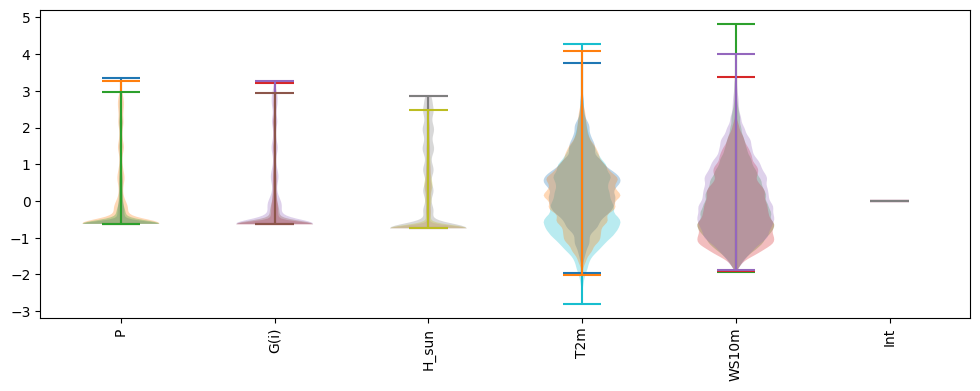

In [27]:
# Se genera una gráfica tipo violín para ver la distribución
# de los valores en cada covariable (entrada) y en la variable a
# predecir (salida)

fig, ax = plt.subplots(figsize=(12,4))
for i in range(datos.shape[1]):
    ax.violinplot(dataset=x_tr[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_vl[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_ts[:,:,i].flatten(), positions=[i])

# Etiquetas eje horizontal
ax.set_xticks(list(range(datos.shape[1])))
ax.set_xticklabels(datos.keys(), rotation=90)
ax.autoscale();

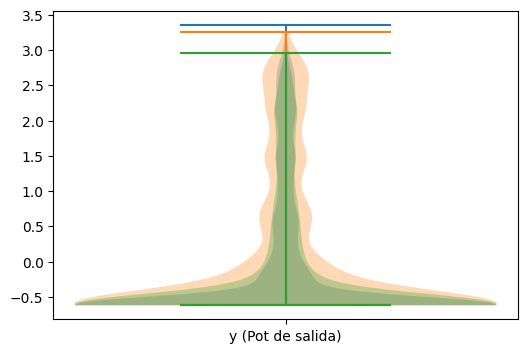

In [12]:
# Y hagamos lo mismo con la variable de salida:
fig, ax = plt.subplots(figsize=(6,4))
ax.violinplot(dataset=y_tr.flatten())
ax.violinplot(dataset=y_vl.flatten())
ax.violinplot(dataset=y_ts.flatten())
ax.set_xticks([1])
ax.set_xticklabels(['y (Pot de salida)']);

In [83]:
column_names = []
for t in range(24):
    for col in datos.columns:
        column_names.append(f"{col}-{t+1}")

print(column_names)

['P-1', 'G(i)-1', 'H_sun-1', 'T2m-1', 'WS10m-1', 'Int-1', 'hora-1', 'mes-1', 'P-2', 'G(i)-2', 'H_sun-2', 'T2m-2', 'WS10m-2', 'Int-2', 'hora-2', 'mes-2', 'P-3', 'G(i)-3', 'H_sun-3', 'T2m-3', 'WS10m-3', 'Int-3', 'hora-3', 'mes-3', 'P-4', 'G(i)-4', 'H_sun-4', 'T2m-4', 'WS10m-4', 'Int-4', 'hora-4', 'mes-4', 'P-5', 'G(i)-5', 'H_sun-5', 'T2m-5', 'WS10m-5', 'Int-5', 'hora-5', 'mes-5', 'P-6', 'G(i)-6', 'H_sun-6', 'T2m-6', 'WS10m-6', 'Int-6', 'hora-6', 'mes-6', 'P-7', 'G(i)-7', 'H_sun-7', 'T2m-7', 'WS10m-7', 'Int-7', 'hora-7', 'mes-7', 'P-8', 'G(i)-8', 'H_sun-8', 'T2m-8', 'WS10m-8', 'Int-8', 'hora-8', 'mes-8', 'P-9', 'G(i)-9', 'H_sun-9', 'T2m-9', 'WS10m-9', 'Int-9', 'hora-9', 'mes-9', 'P-10', 'G(i)-10', 'H_sun-10', 'T2m-10', 'WS10m-10', 'Int-10', 'hora-10', 'mes-10', 'P-11', 'G(i)-11', 'H_sun-11', 'T2m-11', 'WS10m-11', 'Int-11', 'hora-11', 'mes-11', 'P-12', 'G(i)-12', 'H_sun-12', 'T2m-12', 'WS10m-12', 'Int-12', 'hora-12', 'mes-12', 'P-13', 'G(i)-13', 'H_sun-13', 'T2m-13', 'WS10m-13', 'Int-13', 

In [50]:
from xgboost import XGBRegressor

def entrenar_multioutput_xgboost(X_train, y_train, X_val, y_val,column_names, stopping_rounds=50, **xgb_params,):
    modelos = []
    n_outputs = y_train.shape[1]

    for i in range(n_outputs):
        model = XGBRegressor(
            eval_metric=['rmse', 'mae'],
            feature_names=column_names,
            **xgb_params,
        )
        model.fit(
            X_train,
            y_train[:, i],
            eval_set=[(X_train, y_train[:, i]), (X_val, y_val[:, i])],
            verbose=False
        )
        modelos.append(model)

    return modelos




X_train = x_tr.reshape((x_tr.shape[0], -1))  
X_val = x_vl.reshape((x_vl.shape[0], -1))   
y_val = y_vl.reshape((y_vl.shape[0], -1))
y_train = y_tr.reshape((y_tr.shape[0], -1)) 
modelos = entrenar_multioutput_xgboost(
    X_train, y_train, X_val, y_val,column_names,
    early_stopping_rounds=50,
    n_estimators=1000,
    max_depth=10,
    learning_rate=0.01,
    subsample=0.7,
    colsample_bytree=0.7
)
modelos

c:\Users\Noel\Desktop\Codigos_Datos_MTIC\TFM_env\lib\site-packages\xgboost\callback.py:386: UserWarning: [21:40:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "feature_names" } are not used.

  self.starting_round = model.num_boosted_rounds()
c:\Users\Noel\Desktop\Codigos_Datos_MTIC\TFM_env\lib\site-packages\xgboost\callback.py:386: UserWarning: [21:40:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "feature_names" } are not used.

  self.starting_round = model.num_boosted_rounds()


[XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=['rmse', 'mae'],
              feature_names=['P-1', 'mes-1', 'hora-1', 'Int-1', 'WS10m-1',
                             'T2m-1', 'H_sun-1', 'G(i)-1', 'P-2', 'mes-2',
                             'hora-2', 'Int-2', 'WS10m-2', 'T2m-2', 'H_sun...
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, ...),
 XGBRegressor(base_score=Non

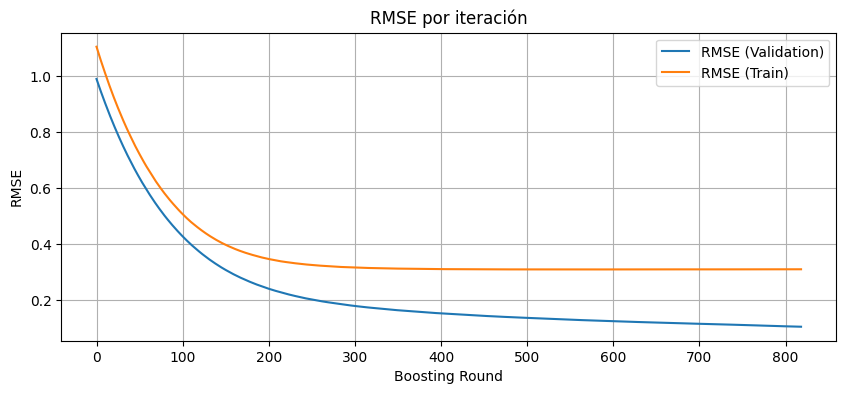

In [23]:
import matplotlib.pyplot as plt

# Call the evals_result() method to get the results dictionary
evals_result = modelos[0].evals_result()
rmse = evals_result['validation_0']['rmse']
rmse2 = evals_result['validation_1']['rmse']
plt.figure(figsize=(10, 4))
plt.plot(rmse, label='RMSE (Validation)')
plt.plot(rmse2, label='RMSE (Train)')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('RMSE por iteración')
plt.legend()
plt.grid(True)
plt.show()


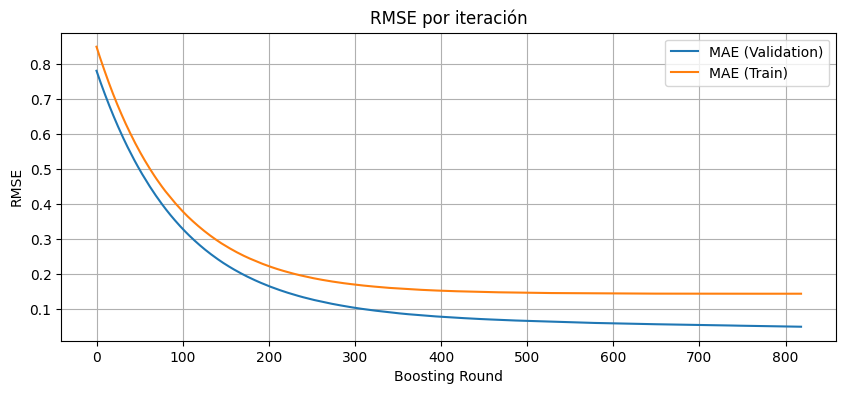

In [27]:
import matplotlib.pyplot as plt

# Call the evals_result() method to get the results dictionary
evals_result = modelos[0].evals_result()
rmse = evals_result['validation_0']['mae']
rmse2 = evals_result['validation_1']['mae']
plt.figure(figsize=(10, 4))
plt.plot(rmse, label='MAE (Validation)')
plt.plot(rmse2, label='MAE (Train)')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('RMSE por iteración')
plt.legend()
plt.grid(True)
plt.show()

(168, 2)


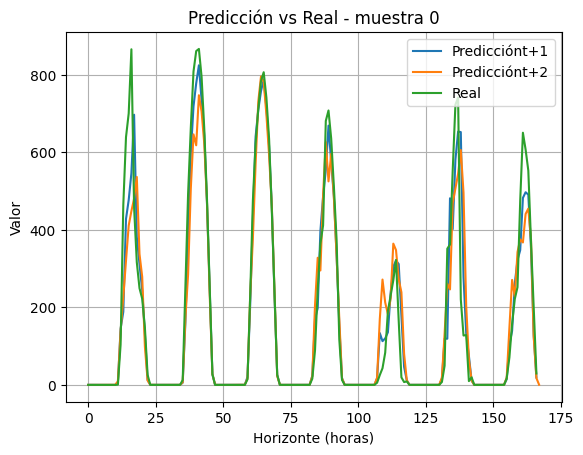

In [29]:
import numpy as np

# Selecciona solo las primeras 168 muestras
X_pred = X_val[:168]

# Para cada modelo, predecimos sobre esas muestras
predicciones = np.column_stack([model.predict(X_pred) for model in modelos])

print(predicciones.shape)  # (168, n_horizonte)


import matplotlib.pyplot as plt

i = 0  # índice de la muestra que quieras ver (0 a 167)
plt.plot(scaler.inverse_transform(predicciones[1:, [0]]), label='Predicciónt+1')
plt.plot(scaler.inverse_transform(predicciones[:, [1]]), label='Predicciónt+2')
plt.plot(scaler.inverse_transform(y_val[1:168, [0]]), label='Real')
plt.title(f'Predicción vs Real - muestra {i}')
plt.xlabel('Horizonte (horas)')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


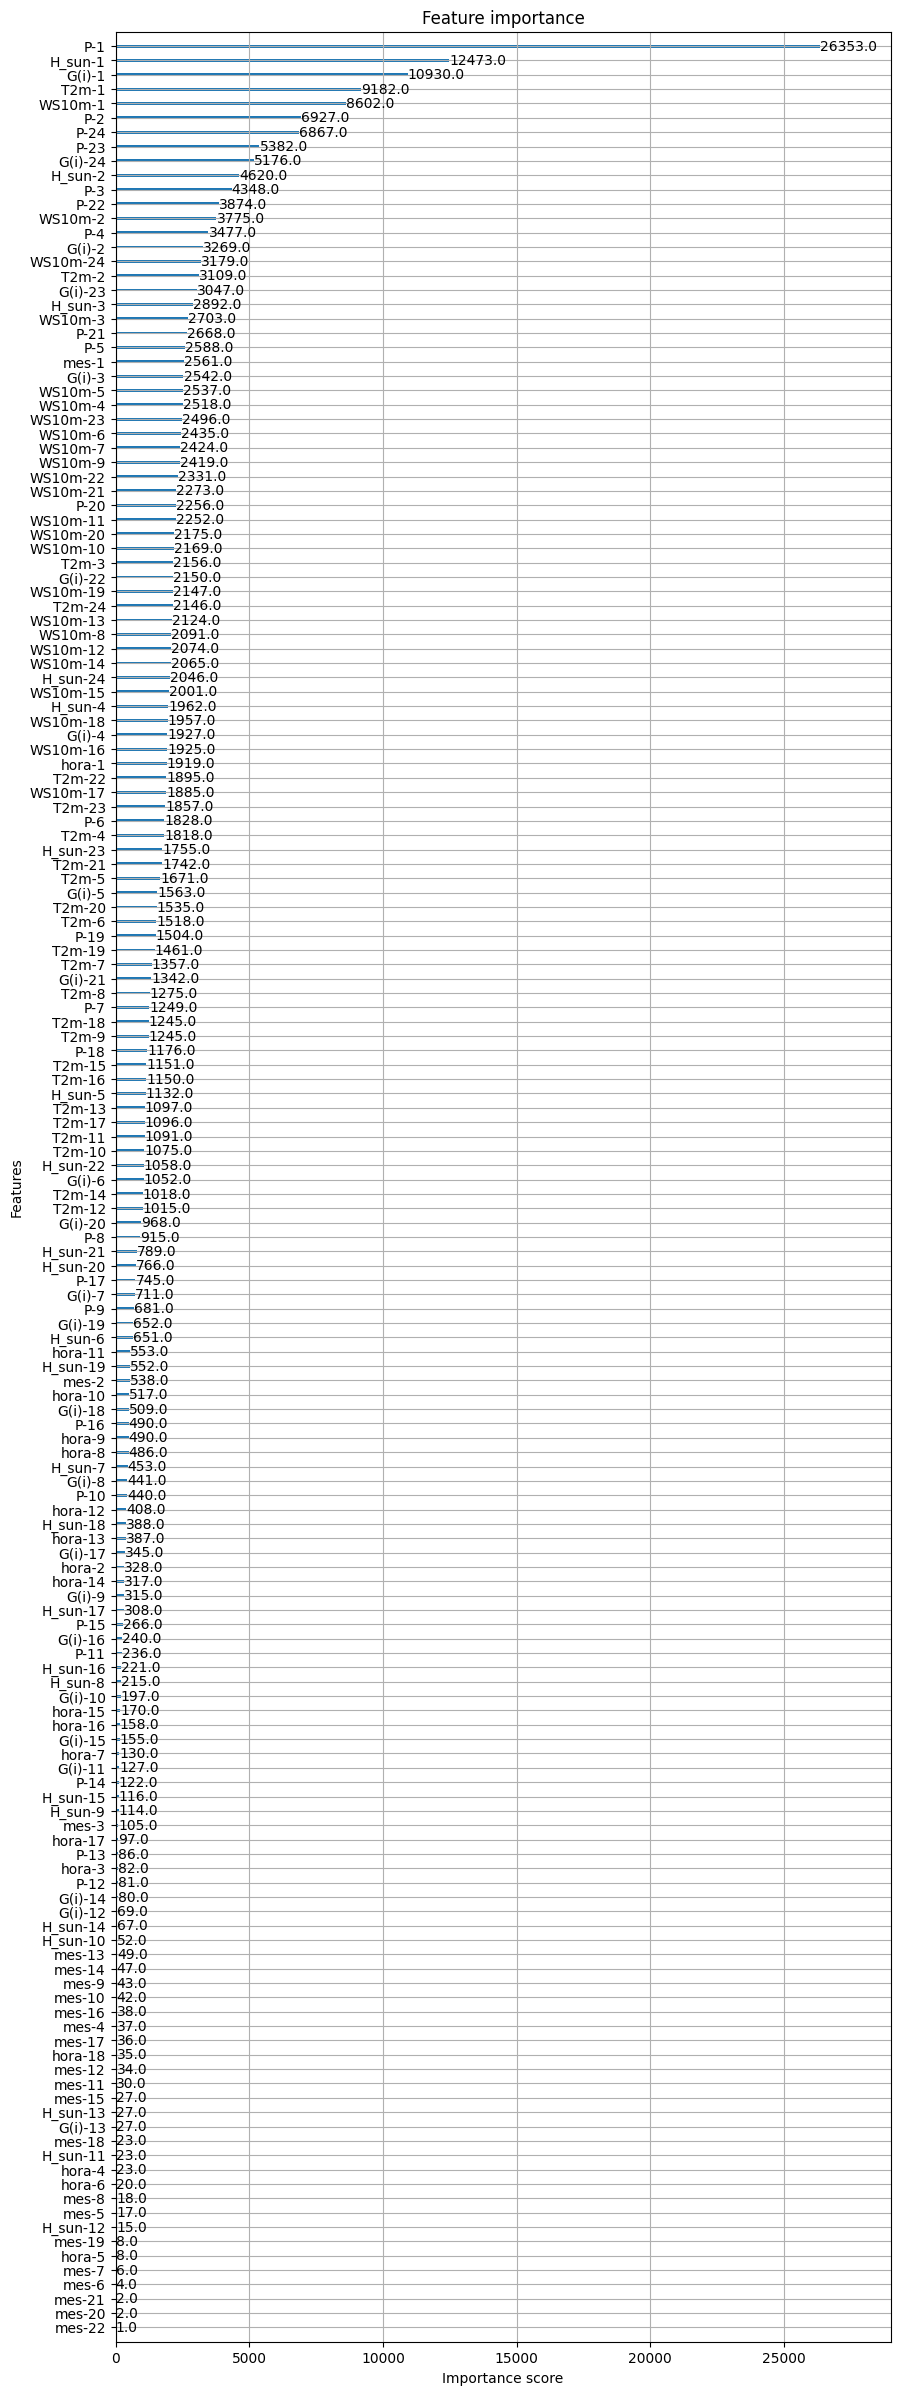

In [84]:
import xgboost as xgb

import matplotlib.pyplot as plt
modelos[0].get_booster().feature_names = column_names
# Plot feature importance
fig,ax = plt.subplots(figsize=(10, 30))
xgb.plot_importance(modelos[0], ax=ax)
plt.show()